In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

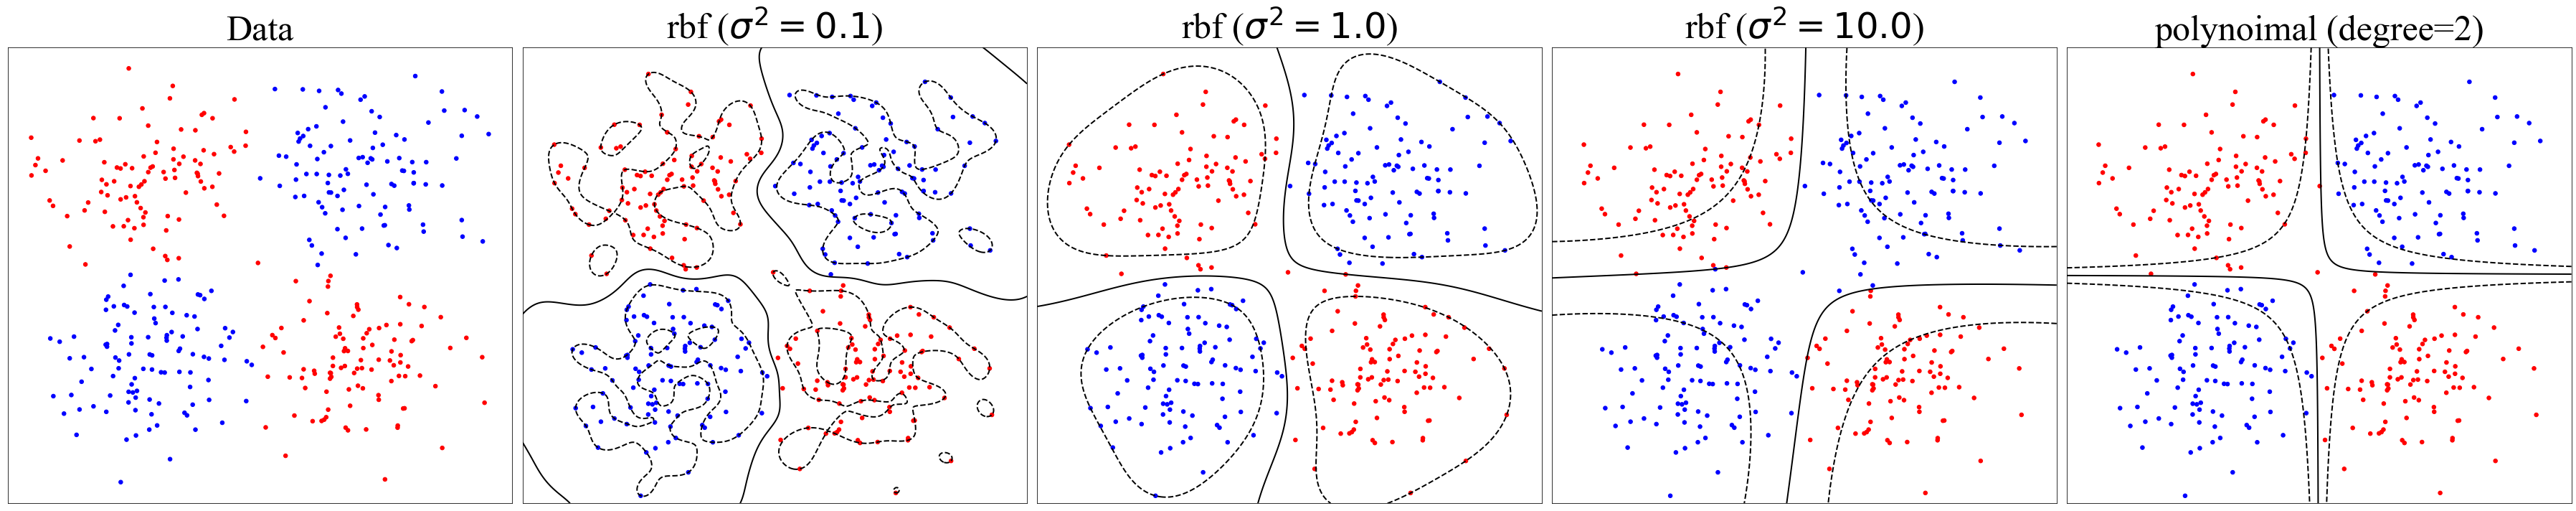

In [4]:

def kernel_linear(X,Y):
    return np.dot(X,Y.T)

def kernel_poly2(X,Y):
    # varphi(x) = [x1, x2, x1*x2]
    X = np.concatenate([X,(X[:,0]*X[:,1]).reshape(-1,1)], axis=1)
    Y = np.concatenate([Y,(Y[:,0]*Y[:,1]).reshape(-1,1)], axis=1)
    return np.dot(X,Y.T)
    

# Data
np.random.seed(0)
c = 0.5
X = np.concatenate([
    c*np.random.randn(100, 2)+[1,1],
    c*np.random.randn(100, 2)+[1,-1],
    c*np.random.randn(100, 2)+[-1,1],
    c*np.random.randn(100, 2)+[-1,-1],
], axis=0)
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)


# Plot
height = 10
title_size = 50
fig, axs = plt.subplots(1, 5, figsize=(height*5,height))

# Original Data
ax = axs[0]
ax.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap='bwr')
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Data', size=title_size, fontname="Times New Roman")

# Decision function 
def plt_decision_function(ax, kernel, gamma=1):
    # gamma = 1/\sigma^2
    clf = svm.SVC(kernel=kernel, gamma=gamma)
    clf.fit(X, Y)
    xx, yy = np.meshgrid(np.linspace(-2.5, 2.5, 500),
                         np.linspace(-2.5, 2.5, 500))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    nlevel = 3
    levels = np.linspace(-1,1,nlevel)
    linestyles = ['--' for _ in range(len(levels))]
    linestyles[nlevel//2] = '-'
    ax.contour(xx, yy, Z, levels=levels, linewidths=2, linestyles=linestyles, colors='k')
#     ax.contourf(xx, yy, Z, levels=levels, cmap="bwr")
    ax.scatter(X[:, 0], X[:, 1], s=30, c=np.sign(clf.decision_function(X)), cmap='bwr')
    ax.set_xticks([])
    ax.set_yticks([])
    return ax

# RBF kernel
for i, gamma in enumerate([10,1,0.1]):
    ax = axs[1+i]
    ax = plt_decision_function(ax, 'rbf', gamma)
    ax.set_title(f'rbf ($\sigma^2={1/gamma}$)', size=title_size, fontname="Times New Roman")

# Separable kernel
ax = axs[4]
ax = plt_decision_function(ax, kernel_poly2)
ax.set_title(f'polynoimal (degree=2)', size=title_size, fontname="Times New Roman")

plt.tight_layout()
save_path = './summary/assets/svm_on_2d_gaussian_vary_kernel'
fig.savefig(save_path, bbox_inches='tight', dpi=100)
